The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

This dataset contains information about flowers with the following attributes:

* Id: Unique identifier for each entry.
* Sepal Length (cm): Length of the sepal in centimeters.
* Sepal Width (cm): Width of the sepal in centimeters.
* Petal Length (cm): Length of the petal in centimeters.
* Petal Width (cm): Width of the petal in centimeters.
* Species: The species of the flower.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


#### Loading the Data

In [7]:
# Load the Iris dataset from sklearn datasets
iris = datasets.load_iris()

### Data Type for each Column(Attribute)

In [8]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


We can see that all the attribute are of correct data type and does not warrant any type conversions


#### Missing Values


In [9]:
print(np.sum(iris_df.isna()))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


There appear to be no missing values.

#### Histogram Representation for each attribute

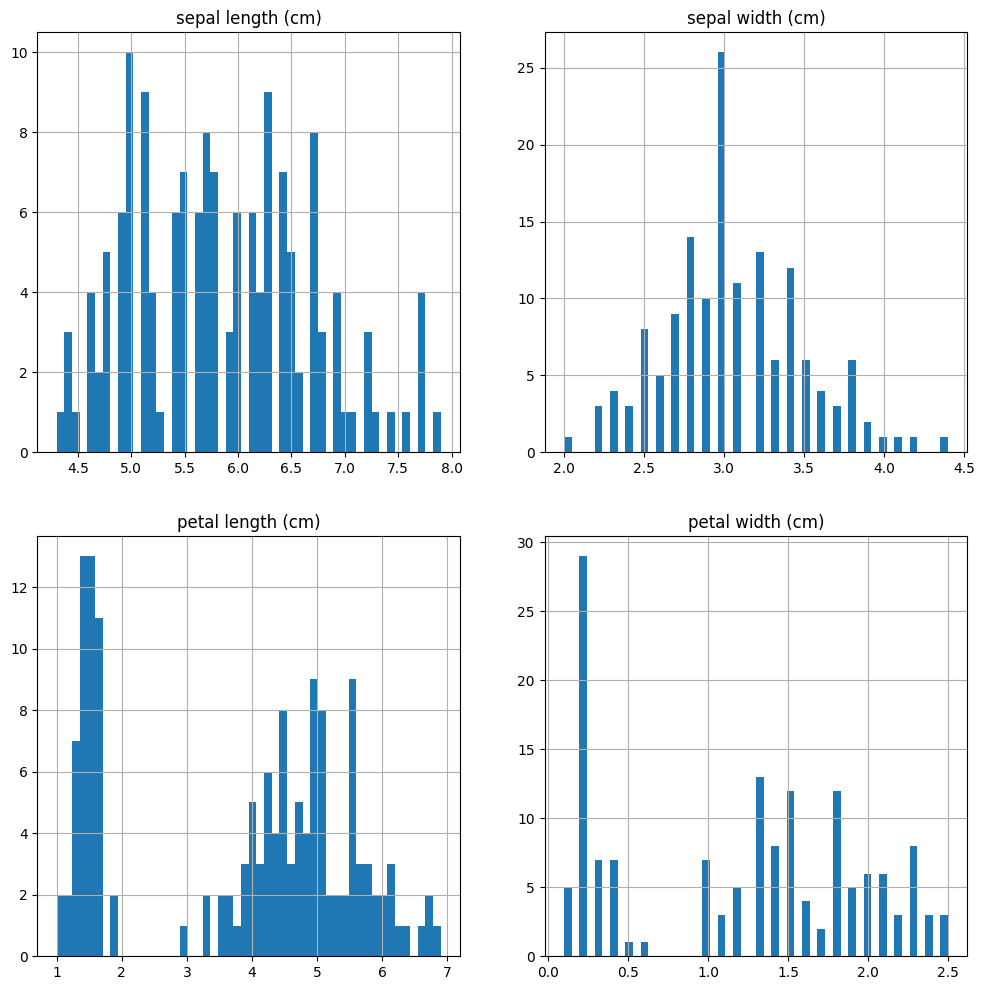

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2):
    for j in range(2):
        col = i * 2 + j
        axs[i, j].hist(iris_df.iloc[:, col], bins=50)
        axs[i, j].set_title(iris_df.columns[col])
        axs[i, j].grid(True)

plt.show()

We can observe some left skewness in the data, there appear to be no 0 values, but owing to context of dataset, removing them may result in loss of important information. So we rather process without standardization of the dataset

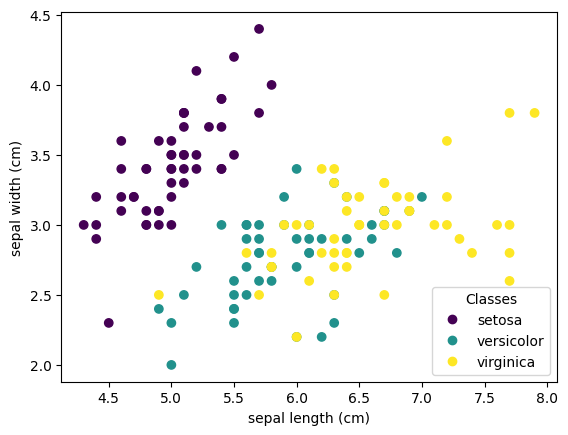

In [11]:
# Plot the Iris dataset
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], 
            iris.target_names, 
            loc="lower right", 
            title="Classes")

## Model Building


### Data Splitting

In [12]:
# Splitting the dataset into features and target
x = iris_df.iloc[:, :4]
y = iris.target

# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Declaration & Training

In [13]:

# Creating different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Training different models
trained_models = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    trained_models[name] = model
    print(f"{name} model trained successfully")


Logistic Regression model trained successfully
Decision Tree model trained successfully
Random Forest model trained successfully
KNN model trained successfully
SVM model trained successfully


c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation


In [14]:
# Making predictions and evaluating models
for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Results for Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Results for Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00  

As is evident from the results, all the models perform exceptionally well with an accuracy of 1.0000, precision of 1.0000, recall of 1.0000, and an F1-Score of 1.0000.
